In [3]:
from PIL import Image, ImageOps

In [4]:
folder_name = '../themes/robot/' 
f_names =  ['player.png']

In [5]:
for file in f_names:
    fn_name = f'{folder_name}/{file}'
    fn_out_name = fn_name
    
    img = Image.open(fn_name)
    img = img.convert("RGBA")
    datas = img.getdata()
    
    newData = []
    tot = 0
    i = 0
    j = 0
    
    w,h = img.width,img.height

    for item in datas:
        if(j==w):
            j = 0
            i+=1
        if item[0] > 200 and item[1] >200 and item[2] >200:
            tot+=1
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
        j+=1
    img.putdata(newData)
    img.save(fn_out_name, "PNG")

In [6]:
for file in f_names:
    fn_name = f'{folder_name}/{file}'
    fn_out_name = fn_name
    img = Image.open(fn_name)
    img = img.convert("RGBA")
    img = img.resize((156,171))
    img.save(fn_out_name, "PNG")

In [7]:
def get_concat_v_cut(im1, im2):
    dst = Image.new('RGBA', (min(im1.width, im2.width), im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [8]:
orien = [1]

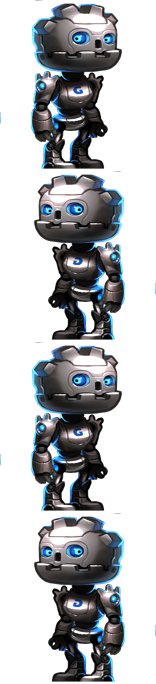

In [9]:
i = 0
for file in f_names:
    fn_name = f'{folder_name}/{file}'
    img = Image.open(fn_name)
    img = img.convert("RGBA")
    img_flip = ImageOps.mirror(img)
    if orien[i]==0:
        im = get_concat_v_cut(img_flip,img)
    else:
        im = get_concat_v_cut(img,img_flip)
    im = get_concat_v_cut(im,im)
    i+=1
im

In [10]:
im.save(f'{folder_name}/player.png',"PNG")